# California Housing Price Prediction
## Regression Analysis using Linear Regression

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# TASK 1: Loading AND Exploration

In [2]:
df = pd.read_csv("housing.csv")
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   ocean_proximity     20640 non-null  object 
 9   median_house_value  20640 non-null  int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


### Dataset Summary
- **Rows:** 20,640 | **Columns:** 10  
- **Numeric:** 9 | **Categorical:** 1


In [4]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [5]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
dtype: int64

- **Missing Values:** `total_bedrooms` → 207

In [8]:
df.fillna({"total_bedrooms": df["total_bedrooms"].median()}, inplace=True)

### Numerical Distributions

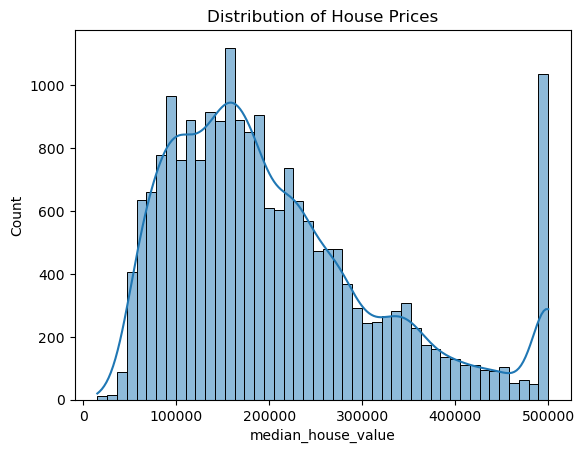

In [9]:
sns.histplot(df["median_house_value"], kde=True)
plt.title("Distribution of House Prices")
plt.show()

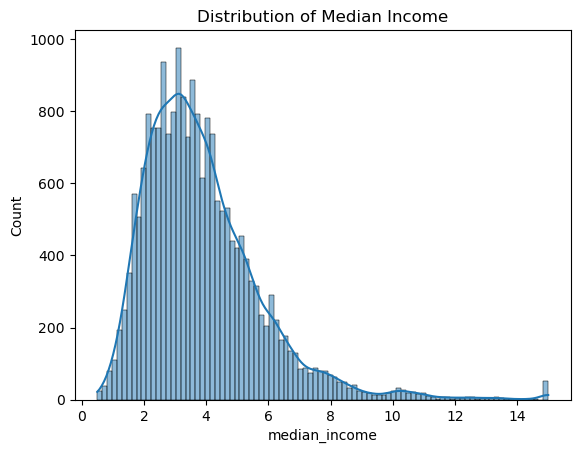

In [10]:
sns.histplot(df["median_income"], kde=True)
plt.title("Distribution of Median Income")
plt.show()

## Numerical Distributions

### Median House Value
- Right-skewed distribution
- Most values lie in the lower to mid range
- Spike at higher values indicates a price cap
- Some high-value outliers present

### Median Income
- Positively skewed distribution
- Majority of values between 2 and 6
- Few extreme values on the higher side

**Note:**  
Both features are skewed and may need scaling or transformation before modeling.


## Identifying Outliers

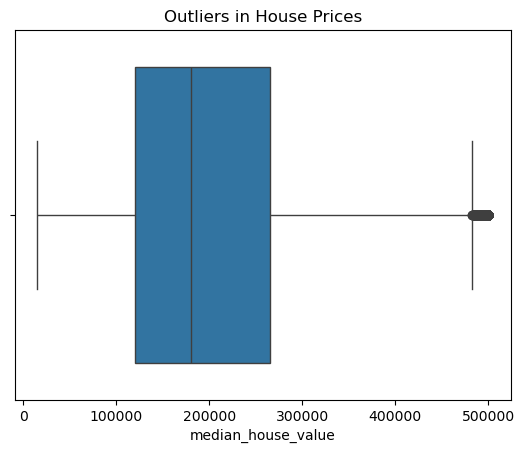

In [12]:
sns.boxplot(x=df["median_house_value"])
plt.title("Outliers in House Prices")
plt.show()

## Outliers in Median House Value

- The boxplot shows the spread of house prices clearly.
- Most values lie within the interquartile range (IQR).
- Several **outliers are present on the higher end**.
- High-value outliers indicate unusually expensive houses.

**Note:**  
Outliers may affect model accuracy and should be handled carefully.


# TASK 2: DATA PREPROCESSING

In [13]:
df = pd.get_dummies(df,columns=["ocean_proximity"],drop_first=True)

#### Encoded categorical feature (`ocean_proximity`) using one-hot encoding

In [15]:
scaler = StandardScaler()

num_cols = ["longitude", "latitude","housing_median_age","total_rooms", 
            "total_bedrooms","population", "households","median_income"]

df[num_cols] = scaler.fit_transform(df[num_cols])

#### Standardized numerical features using `StandardScaler`


# TASK 3: FEATURE SELECTION

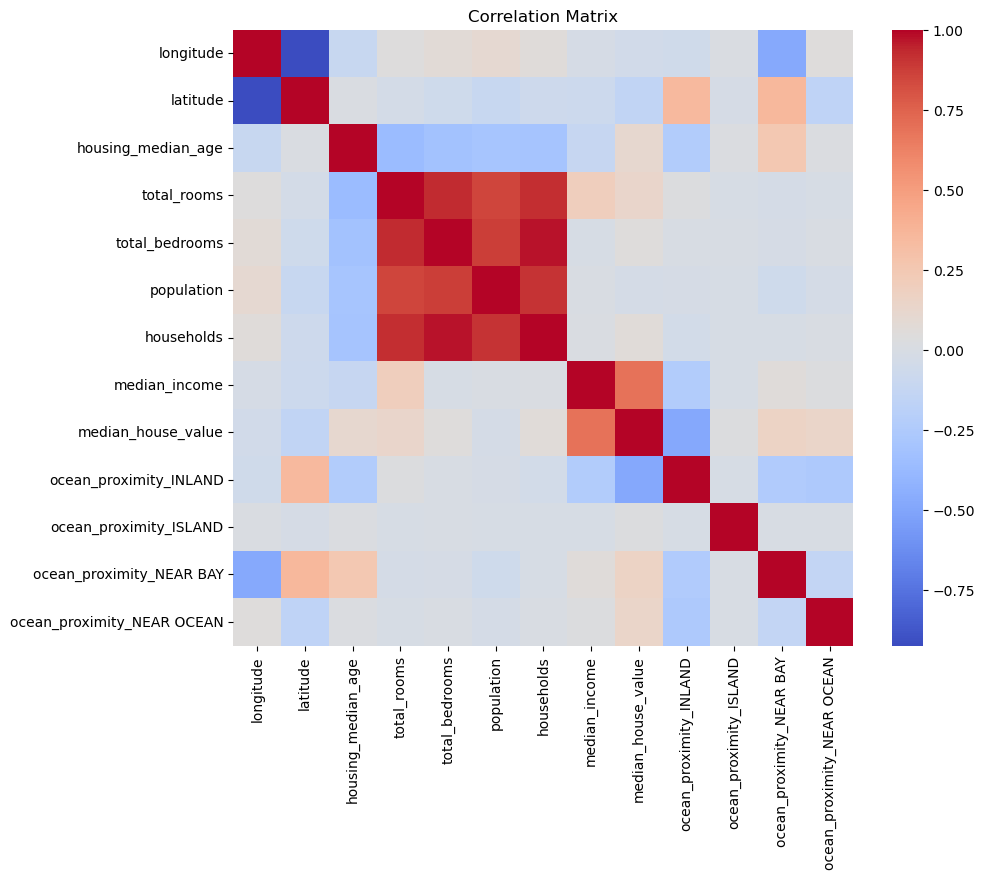

In [16]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

## Feature Selection: Correlation Matrix

- The correlation matrix shows relationships between numerical features.
- **Median income** has the strongest positive correlation with house prices.
- Features like **total rooms, total bedrooms, population, and households** are highly correlated with each other.
- This indicates **multicollinearity**, meaning these features carry similar information.
- **Ocean proximity** features show that houses near the ocean or bay tend to have higher prices.
- **Inland** locations are negatively correlated with house prices.


In [17]:
X = df.drop("median_house_value", axis=1)
y = df["median_house_value"]

# TASK 4: MODEL TRAINING

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [20]:
y_pred = model.predict(X_test)

In [21]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("RMSE:", rmse)
print("R² Score:", r2)


RMSE: 70060.5218447352
R² Score: 0.6254240620553605


- Splitted the dataset into training (80%) and testing (20%) sets  
- Trained a Linear Regression model on the training data  
- Evaluated model performance using RMSE and R² score on the test set

# DELIVERABLES

## Predicted price vs actual price

In [22]:
results = pd.DataFrame({"Actual Price": y_test,"Predicted Price": y_pred})
results.head()

,Actual Price,Predicted Price
20046,47700,54055.448899
3024,45800,124225.338937
15663,500001,255489.379492
20484,218600,268002.431569
9814,278000,262769.434816


#### Baseline Linear Regression model shows underfitting, indicating the need for more complex models

In [23]:
feature_importance = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model.coef_
}).sort_values(by="Coefficient", ascending=False)

feature_importance


,Feature,Coefficient
9,ocean_proximity_ISLAND,136125.072615
7,median_income,74991.698606
4,total_bedrooms,43107.993243
6,households,18448.016131
2,housing_median_age,13871.277832
11,ocean_proximity_NEAR OCEAN,3431.140073
10,ocean_proximity_NEAR BAY,-5136.642217
3,total_rooms,-13136.290362
8,ocean_proximity_INLAND,-39786.656161
5,population,-43228.323370


- Linear Regression coefficients indicate that median income and proximity to water have the strongest impact on house prices

# CONCLUSION

#### In this project, a complete regression workflow was applied to the California Housing dataset to predict median house values using demographic, housing, and location-based features. Missing values in `total_bedrooms` were handled using median imputation, categorical location data was encoded using one-hot encoding, and numerical features were standardized for consistent scaling.

#### Exploratory and correlation analysis highlighted median income and ocean proximity as strong positive drivers of house prices, while inland location and higher population density were associated with lower values. A baseline Linear Regression model was trained using an 80–20 train-test split and evaluated using RMSE and R² metrics.

#### Although the model captured general pricing trends, it exhibited underfitting—particularly for high-value properties—indicating that linear assumptions are insufficient for this dataset. Nevertheless, the analysis provided meaningful insights into key price-driving factors and established a solid baseline, highlighting the need for more advanced, non-linear models for improved performance.
